# llm_perf dataset

In [1]:
import pandas as pd

df = pd.read_csv('data/aggregated_llm_perf.csv')

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             1944 non-null   object 
 1   throughput        1944 non-null   float64
 2   response_length   1944 non-null   int64  
 3   latency           1944 non-null   float64
 4   energy            1944 non-null   float64
 5   gpu               1944 non-null   object 
 6   task              1944 non-null   object 
 7   parameters_count  1944 non-null   float64
 8   energy_per_token  1944 non-null   float64
 9   dtype             1944 non-null   object 
 10  optimization      408 non-null    object 
 11  quantization      1180 non-null   object 
 12  cuda-fp16         1944 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 184.3+ KB
None


In [3]:
print(df.describe())

        throughput  response_length      latency        energy  \
count  1944.000000           1944.0  1944.000000   1944.000000   
mean     67.711569            256.0     8.396854   2276.563058   
std      73.213402              0.0     8.606695   2298.845976   
min       3.380000            256.0     0.394000     57.231360   
25%      26.700000            256.0     3.330000    836.812800   
50%      40.750000            256.0     6.285000   1700.352000   
75%      76.900000            256.0     9.600000   2803.968000   
max     650.000000            256.0    75.700000  20459.520000   

       parameters_count  energy_per_token  
count       1944.000000       1944.000000  
mean           6.121422          0.002470  
std            9.428142          0.002494  
min            0.001000          0.000062  
25%            0.410000          0.000908  
50%            3.000000          0.001845  
75%            7.000000          0.003043  
max           70.000000          0.022200  


In [4]:
from IPython.display import display
display(df)

,model,throughput,response_length,latency,energy,gpu,task,parameters_count,energy_per_token,dtype,optimization,quantization,cuda-fp16
0,EleutherAI/gpt-neox-20b,27.4,256,9.34,3013.6320,NVIDIA A100-SXM4-80GB,chat,20.00,0.003270,float16,NaN,gptq-4bit+exllama-v1,False
1,EleutherAI/pythia-6.9b-deduped,42.3,256,6.05,1649.6640,NVIDIA A100-SXM4-80GB,chat,6.90,0.001790,float16,NaN,gptq-4bit+exllama-v1,False
2,EleutherAI/pythia-6.7b,39.9,256,6.41,1686.5280,NVIDIA A100-SXM4-80GB,chat,6.70,0.001830,float16,NaN,gptq-4bit+exllama-v1,False
3,EleutherAI/pythia-1.4b-deduped,54.8,256,4.67,1115.1360,NVIDIA A100-SXM4-80GB,chat,1.40,0.001210,float16,NaN,gptq-4bit+exllama-v1,False
4,EleutherAI/gpt-j-6b,30.8,256,8.31,2119.6800,NVIDIA A100-SXM4-80GB,chat,6.00,0.002300,float16,NaN,gptq-4bit+exllama-v1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,ai-forever/mGPT,98.8,256,2.59,684.7488,NVIDIA GeForce RTX 4090,chat,1.30,0.000743,float32,NaN,NaN,False
1940,bigscience/bloom-3b,65.3,256,3.92,1041.4080,NVIDIA GeForce RTX 4090,chat,3.00,0.001130,float32,NaN,NaN,False
1941,togethercomputer/RedPajama-INCITE-Base-3B-v1,60.4,256,4.24,1041.4080,NVIDIA GeForce RTX 4090,chat,3.00,0.001130,float32,NaN,NaN,False
1942,ahxt/LiteLlama-460M-1T,127.0,256,2.01,321.6384,NVIDIA GeForce RTX 4090,chat,0.46,0.000349,float32,NaN,NaN,False


# Analyse de parameters_count 

In [5]:
parameters_count_column = df['parameters_count']

entity_counts = parameters_count_column.value_counts()

print("Nombre total d'entités uniques :", len(entity_counts))
print("\nNombre de chaque entité :")
print(entity_counts)

Nombre total d'entités uniques : 72

Nombre de chaque entité :
parameters_count
7.000     347
3.000     122
1.300     101
13.000    100
0.031      96
         ... 
1.610       7
0.430       6
0.169       6
70.000      5
2.780       4
Name: count, Length: 72, dtype: int64


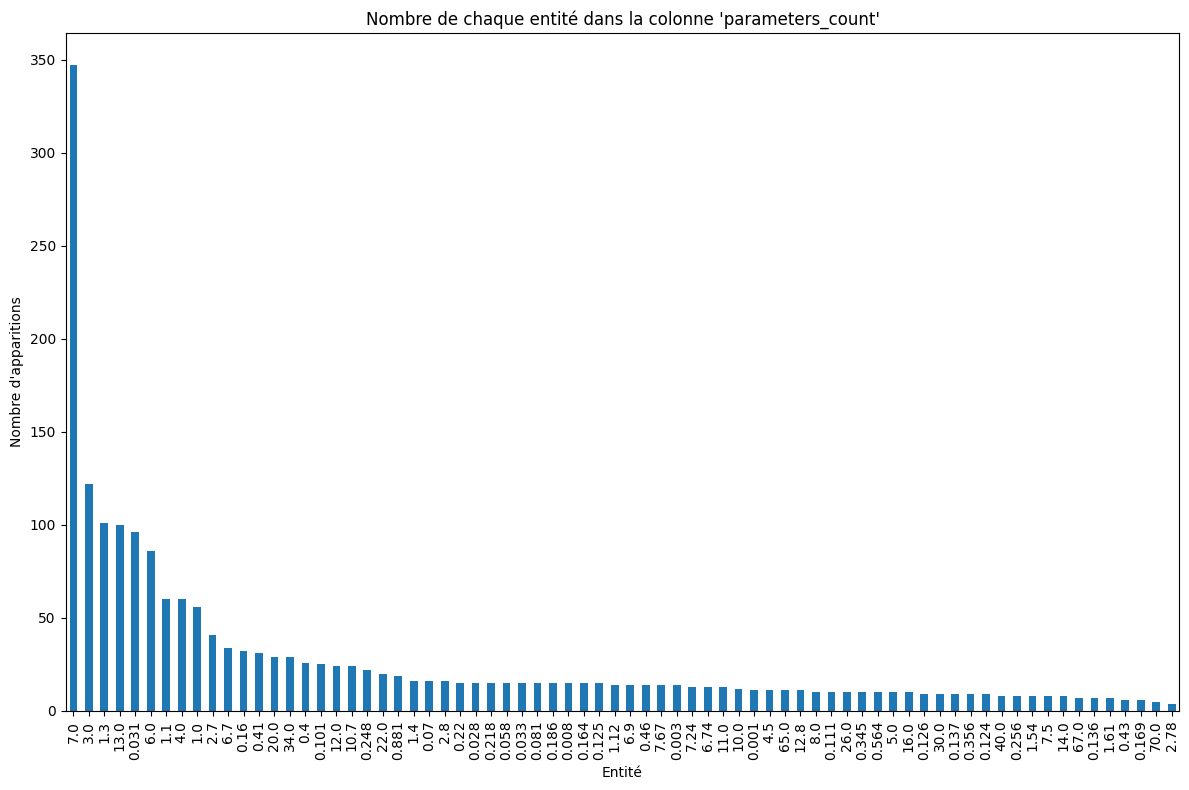

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

entity_counts.plot(kind='bar')

plt.title("Nombre de chaque entité dans la colonne 'parameters_count'")
plt.xlabel('Entité')
plt.ylabel('Nombre d\'apparitions')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_encoded = df.copy()

le = LabelEncoder()

cols_to_encode = ['model', 'gpu', 'task',
                  'dtype', 'optimization', 'quantization']

encoding_dict = {}

for col in cols_to_encode:
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    encoding_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print(df_encoded.dtypes)

for col, mapping in encoding_dict.items():
    print(f'Encodage pour {col}:')
    for key, value in mapping.items():
        print(f'{key} -> {value}')
    print()

df_encoded.to_csv('data_encoded.csv', index=False)

model                 int64
throughput          float64
response_length       int64
latency             float64
energy              float64
gpu                   int64
task                  int64
parameters_count    float64
energy_per_token    float64
dtype                 int64
optimization          int64
quantization          int64
cuda-fp16              bool
dtype: object
Encodage pour model:
01-ai/Yi-34B -> 0
01-ai/Yi-34B-200K -> 1
01-ai/Yi-6B -> 2
01-ai/Yi-6B-200K -> 3
AI-Sweden-Models/gpt-sw3-1.3b -> 4
AI-Sweden-Models/gpt-sw3-126m -> 5
AI-Sweden-Models/gpt-sw3-20b -> 6
AI-Sweden-Models/gpt-sw3-356m -> 7
AI-Sweden-Models/gpt-sw3-40b -> 8
AI-Sweden-Models/gpt-sw3-6.7b -> 9
AI-Sweden-Models/gpt-sw3-6.7b-v2 -> 10
BEE-spoke-data/Mixtral-GQA-400m-v2 -> 11
BEE-spoke-data/NanoLlama-GQA-L10-A32_KV8-v13-KI -> 12
BEE-spoke-data/smol_llama-101M-GQA -> 13
BEE-spoke-data/smol_llama-220M-GQA -> 14
BEE-spoke-data/smol_llama-81M-tied -> 15
BEE-spoke-data/verysmol_llama-v11-KIx2 -> 16
Dampish/Ste

| Colonne         | Nombre de Catégories | Détails des Catégories Encodées                     |
|-----------------|----------------------|-----------------------------------------------------|
| model           | 181                  | Voir Encodage pour model                            |
| gpu             | 2                    | 0: NVIDIA A100-SXM4-80GB, 1: NVIDIA GeForce RTX 4090|
| task            | 1                    | 0: chat                                            |
| dtype           | 3                    | 0: bfloat16, 1: float16, 2: float32                 |
| optimization    | 3                    | 0: BetterTransformer, 1: FlashAttentionV2, 2: nan  |
| quantization    | 8                    | 0: awq-4bit+gemm, 1: awq-4bit+gemv, 2: bnb-4bit,   |
|                 |                      | 3: bnb-8bit, 4: gptq-4bit, 5: gptq-4bit+exllama-v1,|
|                 |                      | 6: gptq-4bit+exllama-v2, 7: nan                     |


# quelques explication sur les entites 


#  - - - dtype - - -

# bfloat16 : Le format bfloat16 (brain floating point) est un format de nombre informatique qui occupe 16 bits dans la mémoire de l’ordinateur1. Fait pour une utilisation dans TensorFlow et TPU (Tensor Processing Unit).

# float16 : Le format float16, est un format de nombre à virgule flottante binaire qui occupe 16 bits (deux octets dans les ordinateurs modernes) dans la mémoire de l’ordinateur. Il est destiné au stockage des valeurs à virgule flottante dans les applications où une précision plus élevée n’est pas essentielle, en particulier le traitement d’images et les réseaux neuronaux


# float32 : Le format float32, est un format de nombre à virgule flottante binaire qui occupe 32 bits dans la mémoire de l’ordinateur. Il représente une large plage dynamique de valeurs numériques en utilisant un point de base flottant.


# La quantification des réseaux neuronaux à ces trois formats de données (bfloat16, float16, float32):

# bfloat16 : Ce format peut être utilisé pour la quantification car il utilise moins de mémoire que le format float32 tout en conservant une plage dynamique similaire. Cela peut être utile pour les réseaux neuronaux profonds où la précision n’est pas aussi cruciale, mais où la plage dynamique est importante.

# float16 : Ce format est également utilisé pour la quantification. Il utilise moins de mémoire que le format float32, mais il a une plage dynamique plus petite. Cela peut être utile pour les réseaux neuronaux où la précision est importante, mais où la plage dynamique peut être sacrifiée.

# (Plage dynamique (dynamic range) désigne l'intervalle de valeurs positives et négatives pouvant être représentées par un format de nombre à virgule flottante tel que float16, float32 or bfloat16. Ces intervalles varient selon le format ; plus le format dispose de bits, plus la plage dynamique sera généralemenet large.)

# float32 : C’est le format standard pour les poids, les biais et les activations dans les réseaux neuronaux. Cependant, il utilise beaucoup de mémoire et de puissance de calcul. La quantification vise à remplacer ce format par des formats de moindre précision (comme bfloat16 ou float16) pour réduire l’empreinte mémoire et les demandes de calcul.


# Parmi les trois formats de données, le format float32 est celui qui demande le plus de ressources de calcul. En effet, les opérations sur des nombres à virgule flottante de 32 bits sont plus coûteuses en termes de calcul que les opérations sur des nombres à virgule flottante de 16 bits ou des nombres bfloat16. 



# - - - optimization - - -

# BetterTransformer : Il s'agit d'une implémentation améliorée du transformeur qui utilise des algorithmes plus rapides et moins gourmands en mémoire pour calculer l'auto-attention. Elle est souvent utilisée pour accélérer l'inférence et permettre aux grands langages modèles (LLM) de traiter des séquences d'entrées plus longues sans manquer de mémoire.

# FlashAttentionV2 : Cette version mise à jour de FlashAttention offre un gain de performances supplémentaire par rapport à sa première itération. FlashAttention V2 fournit une méthode alternative pour calculer l'auto-attention qui nécessite plus de FLOPS mais réduit considérablement la demande sur la mémoire haut débit de la GPU. Ceci se traduit par une augmentation significative de la vitesse pendant l'inférence.

# En résumé, ces deux options sont axées sur l'optimisation des performances lors du calcul de l'auto-attention, soit en termes de vitesse, soit en termes de consommation de mémoire. 



# - - - quantization - - - 


# La quantification consiste à réduire la précision des nombres utilisés pour représenter les données dans un modèle, généralement enapproximant les valeurs flottantes avec des entiers sur une largeur de bits inférieure. Ce processus peut contribuer à diminuer l'empreinte mémoire et les besoins en calcul des modèles, ce qui permet de les exécuter plus efficacement sur certains matériels. Voici une explication de chaque type de quantification mentionné :

# awq-4bit : La quantification d'approximation du poids (Awq) est une méthode de quantification des poids dans les modèles d'apprentissage profond en utilisant des représentations à faible précision tout en minimisant la perte de précision. Les "4bits" indiquent que les poids sont représentés à l'aide de 4 bits .


# awq-4bit + gemm : GEMM signifie Produit Matriciel Général, une opération courante trouvée dans de nombreuses couches de réseaux neuronaux. Dans ce cas, l'Awq-4bit est appliqué spécifiquement aux poids utilisés pendant les opérations GEMM.

# awq-4bit + gemv : GEMV signifie Multiplication Matrice Vecteur Générale, une autre opération courante d'algèbre linéaire présente dans les réseaux neuronaux. De manière similaire au point ci-dessus, l'Awq-4bit est utilisé pour les poids impliqués dans ces opérations GEMV.


# bnb-4bit : Le Narrowing par Bit (BNB) est une approche différente de la quantification où plutôt qu'une approximation directe des poids à pleine précision. Le BNB-4bit stocke les poids raffinés en utilisant seulement 4 bits, offrant ainsi jusqu'à 16 valeurs de poids distinctes.

# bnb-8bit : Même principe que BNB-4bit mais cette fois-ci en utilisant 8 bits, fournissant une meilleure précision au détriment d'un espace de stockage supplémentaire requis.

# gptq-4bit : La quantification par regroupement de précisions adaptatives (GPTQ) est une technique de quantification conçue pour minimiser l'impact des calculs en faible précision lors de l'exécution des réseaux de neurones convolutionnels (ConvNets). Elle regroupe dynamiquement les canaux au sein d'une couche basée sur la similarité et y applique des facteurs d'échelle avant la quantification. Tout comme les autres méthodes présentées, il stocke les résultats sous forme de 4 bits.

# gptq-4bit + exllama-v1, gptq-4bit + exllama-v2 : Ces variantes combinent GPTQ avec les versions Exllama v1 ou v2 respectivement. Il s'agit  d'une mise en oeuvre spécifique liée au traitement des entrées du ConvNet ou à la réalisation de tâches supplémentaires.

# nan : Non applicable ; incluse possiblement comme marqueur indiquant qu'aucune quantification n'a été effectuée sur certains de ces modèles particuliers.

In [8]:
display(df_encoded)

,model,throughput,response_length,latency,energy,gpu,task,parameters_count,energy_per_token,dtype,optimization,quantization,cuda-fp16
0,28,27.4,256,9.34,3013.6320,0,0,20.00,0.003270,1,2,5,False
1,42,42.3,256,6.05,1649.6640,0,0,6.90,0.001790,1,2,5,False
2,41,39.9,256,6.41,1686.5280,0,0,6.70,0.001830,1,2,5,False
3,31,54.8,256,4.67,1115.1360,0,0,1.40,0.001210,1,2,5,False
4,24,30.8,256,8.31,2119.6800,0,0,6.00,0.002300,1,2,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,83,98.8,256,2.59,684.7488,1,0,1.30,0.000743,2,2,7,False
1940,89,65.3,256,3.92,1041.4080,1,0,3.00,0.001130,2,2,7,False
1941,175,60.4,256,4.24,1041.4080,1,0,3.00,0.001130,2,2,7,False
1942,81,127.0,256,2.01,321.6384,1,0,0.46,0.000349,2,2,7,False


#  Analyse descriptive pour chaque variable


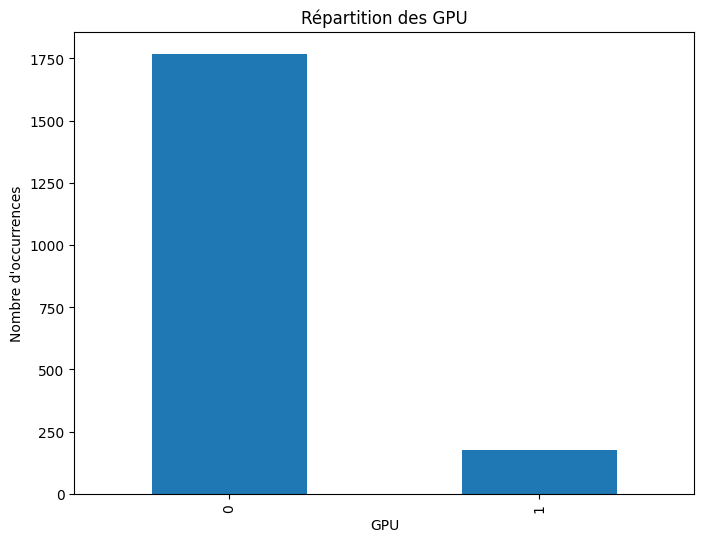

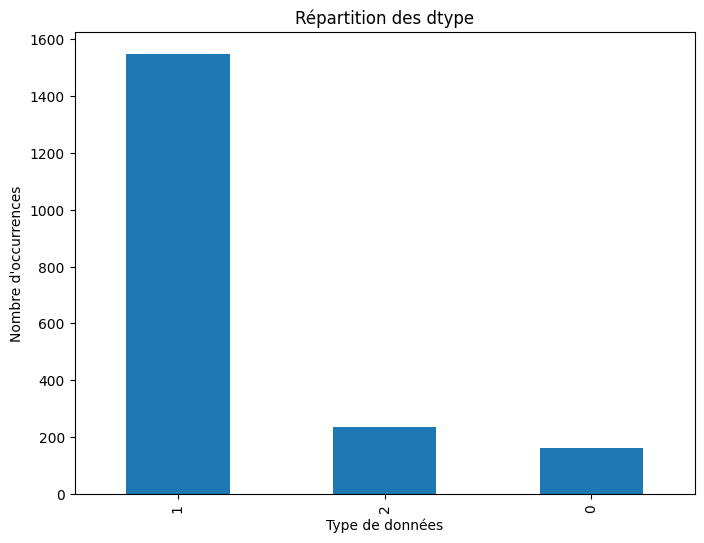

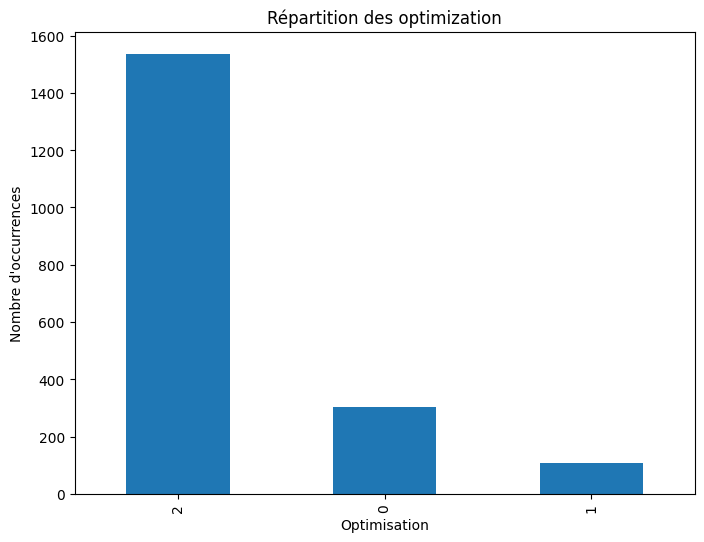

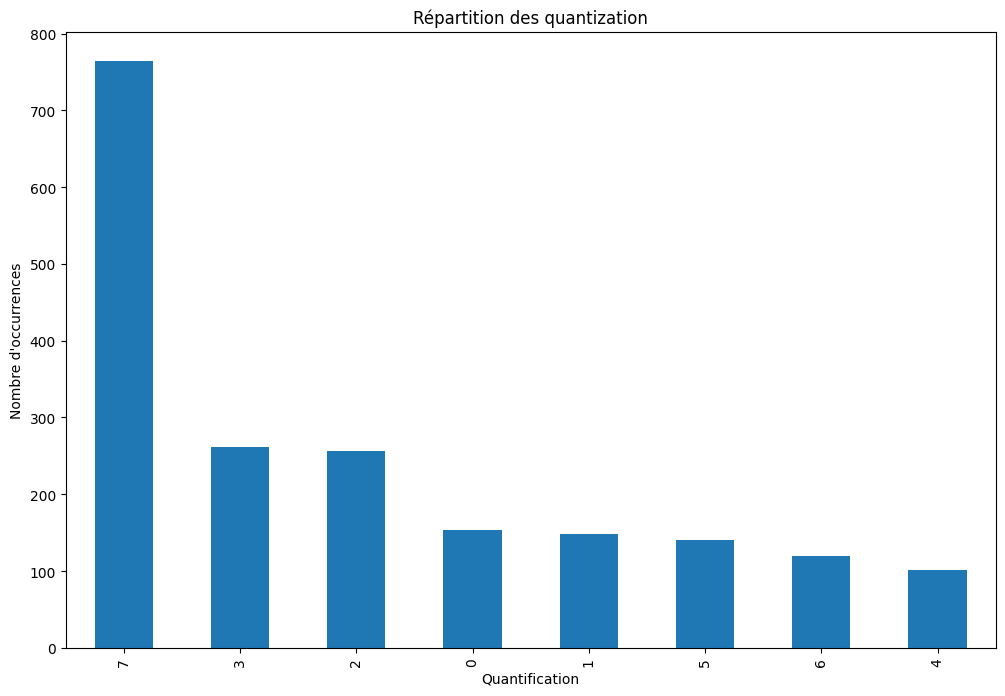

In [9]:
import matplotlib.pyplot as plt

# gpu
plt.figure(figsize=(8, 6))
df_encoded['gpu'].value_counts().plot(kind='bar')
plt.title('Répartition des GPU')
plt.xlabel('GPU')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# dtype
plt.figure(figsize=(8, 6))
df_encoded['dtype'].value_counts().plot(kind='bar')
plt.title('Répartition des dtype')
plt.xlabel('Type de données')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# optimization
plt.figure(figsize=(8, 6))
df_encoded['optimization'].value_counts().plot(kind='bar')
plt.title('Répartition des optimization')
plt.xlabel('Optimisation')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# quantization
plt.figure(figsize=(12, 8))
df_encoded['quantization'].value_counts().plot(kind='bar')
plt.title('Répartition des quantization')
plt.xlabel('Quantification')
plt.ylabel('Nombre d\'occurrences')
plt.show()

#  Analyse plus poussée pour chaque variable


# étudier la relation entre la variable 'dtype' et la variable 'energy'

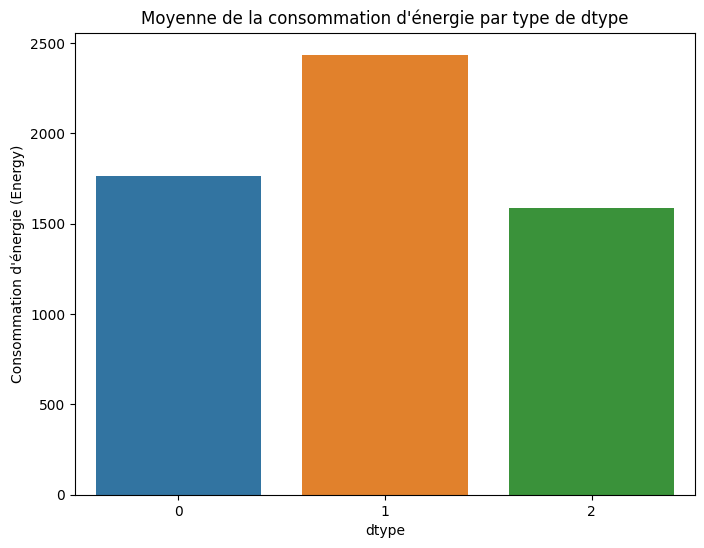

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la moyenne de 'energy' pour chaque type de 'dtype'
dtype_energy_mean = df_encoded.groupby('dtype')['energy'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='dtype', y='energy', data=dtype_energy_mean)
plt.title('Moyenne de la consommation d\'énergie par type de dtype')
plt.xlabel('dtype')
plt.ylabel('Consommation d\'énergie (Energy)')
plt.show()


# Calcul de la moyenne de la variable 'energy' pour chaque type d'optimization

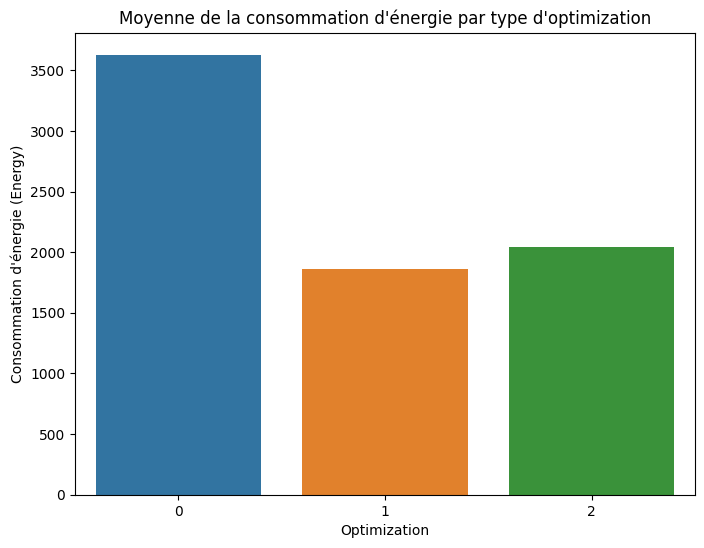

In [11]:
optimization_energy_mean = df_encoded.groupby(
    'optimization')['energy'].mean().reset_index()

# Visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x='optimization', y='energy', data=optimization_energy_mean)
plt.title('Moyenne de la consommation d\'énergie par type d\'optimization')
plt.xlabel('Optimization')
plt.ylabel('Consommation d\'énergie (Energy)')
plt.show()

# Calcul de la moyenne de la variable 'energy' pour chaque type de 'quantization' 

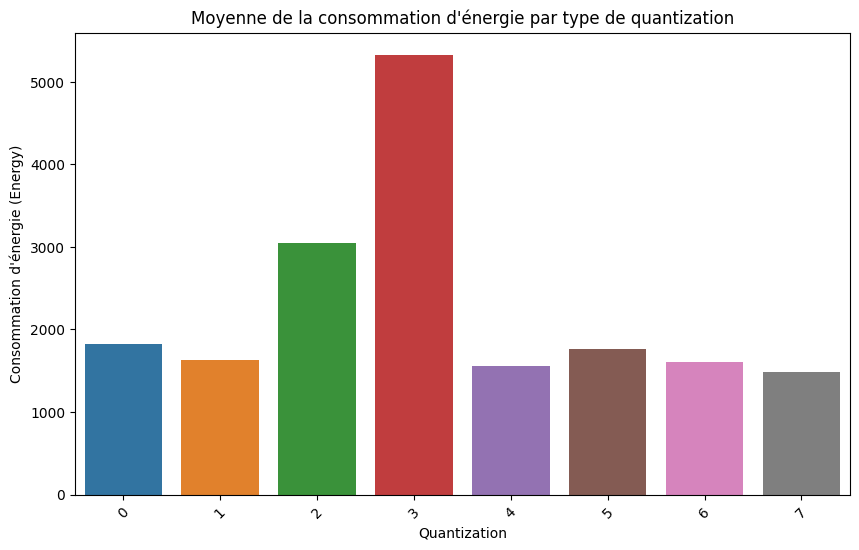

In [12]:
quantization_energy_mean = df_encoded.groupby(
    'quantization')['energy'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='quantization', y='energy', data=quantization_energy_mean)
plt.title('Moyenne de la consommation d\'énergie par type de quantization')
plt.xlabel('Quantization')
plt.ylabel('Consommation d\'énergie (Energy)')
plt.xticks(rotation=45)
plt.show()

# energy ou energy_per_token c'est les meme resultats a chaque fois

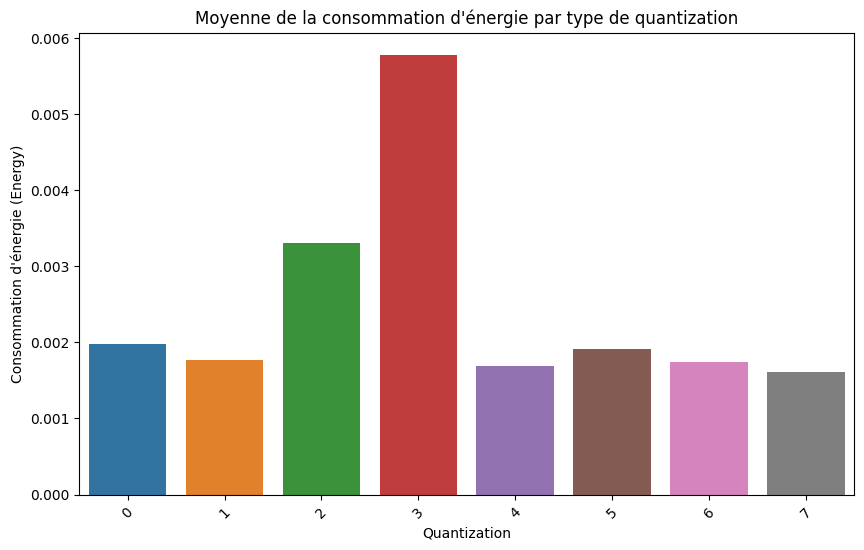

In [13]:
quantization_energy_mean = df_encoded.groupby(
    'quantization')['energy_per_token'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='quantization', y='energy_per_token',
            data=quantization_energy_mean)
plt.title('Moyenne de la consommation d\'énergie par type de quantization')
plt.xlabel('Quantization')
plt.ylabel('Consommation d\'énergie (Energy)')
plt.xticks(rotation=45)
plt.show()

# analyser la relation entre la variable 'latency' et les variables 'quantization', 'optimization' et 'dtype'

# Latence : temps global nécessaire au modèle pour générer la réponse complète pour un utilisateur.

Relation entre 'latency' et 'quantization'

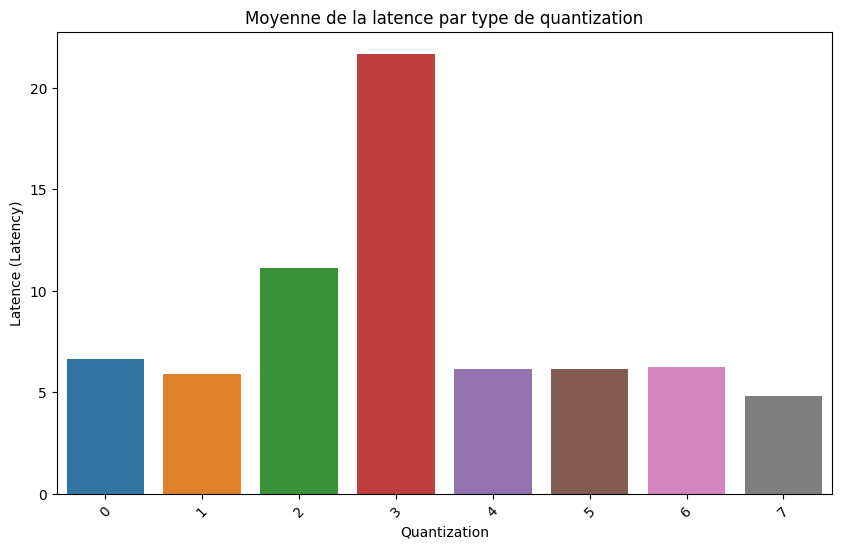

In [14]:
# Calcul de la moyenne de 'latency' pour chaque type de 'quantization'
quantization_latency_mean = df_encoded.groupby(
    'quantization')['latency'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='quantization', y='latency', data=quantization_latency_mean)
plt.title('Moyenne de la latence par type de quantization')
plt.xlabel('Quantization')
plt.ylabel('Latence (Latency)')
plt.xticks(rotation=45)
plt.show()

Relation entre 'latency' et 'optimization'

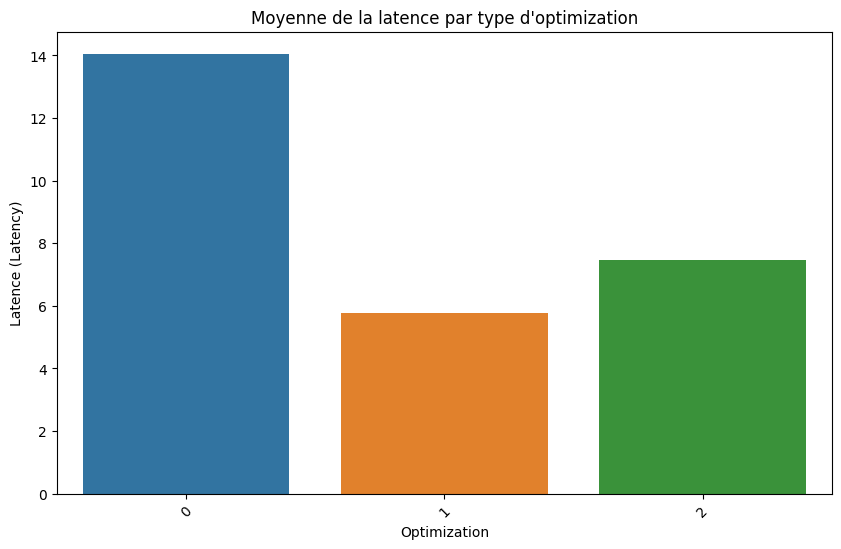

In [15]:
# Calcul de la moyenne de 'latency' pour chaque type d'optimization
optimization_latency_mean = df_encoded.groupby(
    'optimization')['latency'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='optimization', y='latency', data=optimization_latency_mean)
plt.title('Moyenne de la latence par type d\'optimization')
plt.xlabel('Optimization')
plt.ylabel('Latence (Latency)')
plt.xticks(rotation=45)
plt.show()

Relation entre 'latency' et 'dtype'

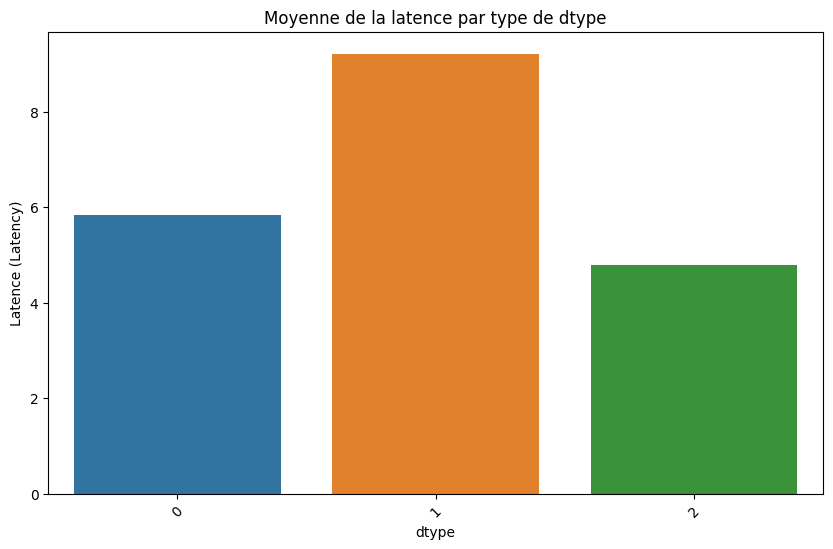

In [16]:
# Calcul de la moyenne de 'latency' pour chaque type de 'dtype'
dtype_latency_mean = df_encoded.groupby(
    'dtype')['latency'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='dtype', y='latency', data=dtype_latency_mean)
plt.title('Moyenne de la latence par type de dtype')
plt.xlabel('dtype')
plt.ylabel('Latence (Latency)')
plt.xticks(rotation=45)
plt.show()

# analyser la relation entre la variable 'throughput' et les variables 'quantization', 'optimization' et 'dtype'

# Débit : nombre de jetons de sortie par seconde qu'un serveur d'inférence peut générer pour tous les utilisateurs et requêtes.

Relation entre 'throughput' et 'quantization'

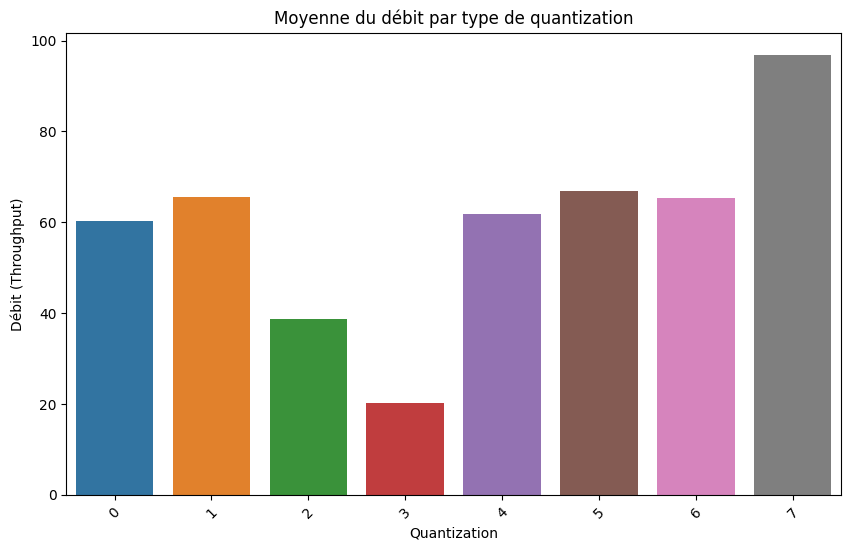

In [17]:
# Calcul de la moyenne de 'throughput' pour chaque type de 'quantization'
quantization_throughput_mean = df_encoded.groupby(
    'quantization')['throughput'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='quantization', y='throughput',
            data=quantization_throughput_mean)
plt.title('Moyenne du débit par type de quantization')
plt.xlabel('Quantization')
plt.ylabel('Débit (Throughput)')
plt.xticks(rotation=45)
plt.show()

Relation entre 'throughput' et 'optimization'

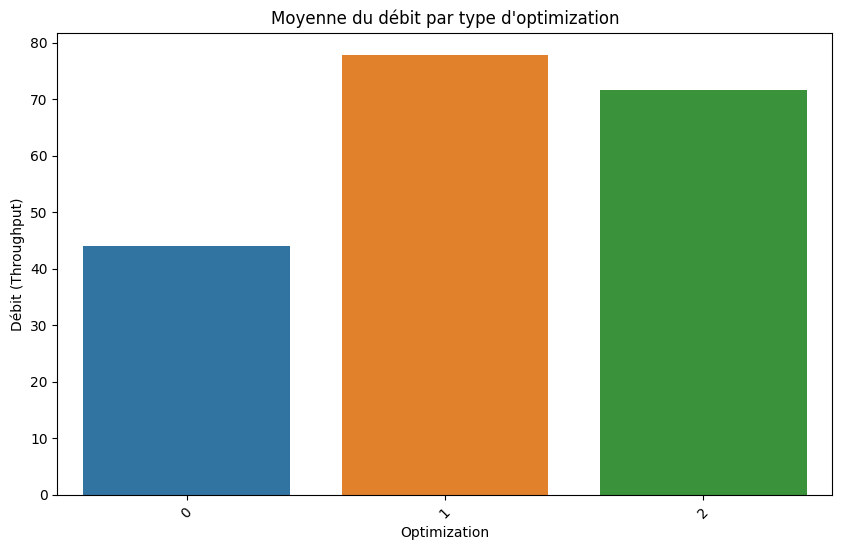

In [18]:
# Calcul de la moyenne de 'throughput' pour chaque type d'optimization
optimization_throughput_mean = df_encoded.groupby(
    'optimization')['throughput'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='optimization', y='throughput',
            data=optimization_throughput_mean)
plt.title('Moyenne du débit par type d\'optimization')
plt.xlabel('Optimization')
plt.ylabel('Débit (Throughput)')
plt.xticks(rotation=45)
plt.show()

Relation entre 'throughput' et 'dtype'

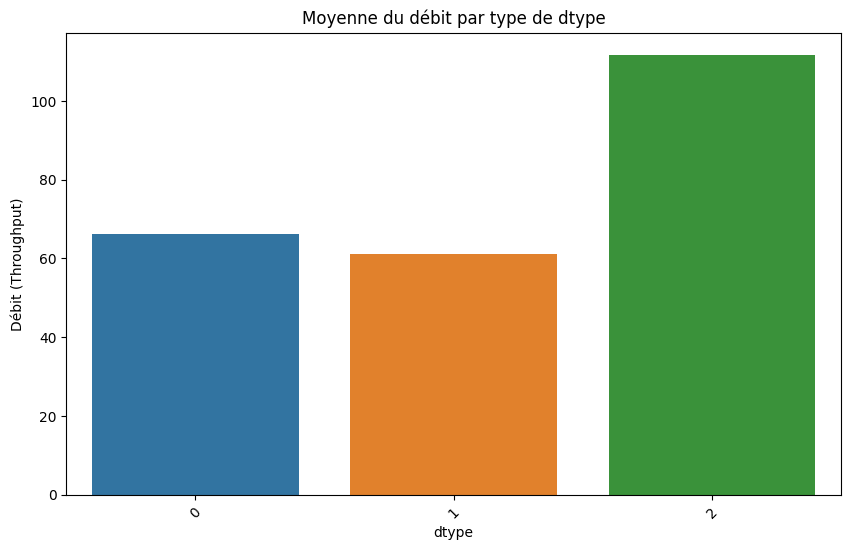

In [19]:
# Calcul de la moyenne de 'throughput' pour chaque type de 'dtype'
dtype_throughput_mean = df_encoded.groupby(
    'dtype')['throughput'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='dtype', y='throughput', data=dtype_throughput_mean)
plt.title('Moyenne du débit par type de dtype')
plt.xlabel('dtype')
plt.ylabel('Débit (Throughput)')
plt.xticks(rotation=45)
plt.show()

# la relation entre la variable 'parameters_count' et la variable 'energy' et déterminer s'il existe une corrélation entre elles

In [20]:
correlation = df_encoded['parameters_count'].corr(df_encoded['energy'])

print("Corrélation entre 'parameters_count' et 'energy':", correlation)

# Une corrélation positive signifie que lorsque la valeur d'une variable augmente, la valeur de l'autre variable a tendance à augmenter également.La magnitude de la corrélation (0.6858815598913961 dans ce cas) indique la force de la relation entre les deux variables. Une valeur proche de 1 indique une forte corrélation, une valeur proche de 0 indique une corrélation faible, et une valeur proche de -1 indique une corrélation négative forte (c'est-à-dire, lorsque la valeur d'une variable augmente, la valeur de l'autre variable a tendance à diminuer).

# Une corrélation de 0.6858815598913964 entre les variables parameters_count et energy signifie qu'il existe une corrélation positive modérée entre ces deux variables.

Corrélation entre 'parameters_count' et 'energy': 0.6858815598913964


# Visualisation des moyennes d'énergie pour chaque entité de 'parameters_count'

In [21]:
# Trouver l'index de la ligne avec la plus grande valeur d'énergie
max_energy_index = df_encoded['energy'].idxmax()

# Obtenir l'entité de 'parameters_count' correspondant à cet index
max_energy_parameters_count = df_encoded.loc[max_energy_index,
                                             'parameters_count']

print("L'entité de parameters_count avec la plus grande valeur d'énergie est:",
      max_energy_parameters_count)

L'entité de parameters_count avec la plus grande valeur d'énergie est: 67.0


In [22]:
parameters_energy_mean = df_encoded.groupby(
    'parameters_count')['energy'].mean().reset_index()

max_energy_entity = parameters_energy_mean.loc[parameters_energy_mean['energy'].idxmax(
)]

print("Entité de parameters_count avec la plus grande valeur d'énergie moyenne:")
print(max_energy_entity)

Entité de parameters_count avec la plus grande valeur d'énergie moyenne:
parameters_count       67.000000
energy              12683.849143
Name: 70, dtype: float64


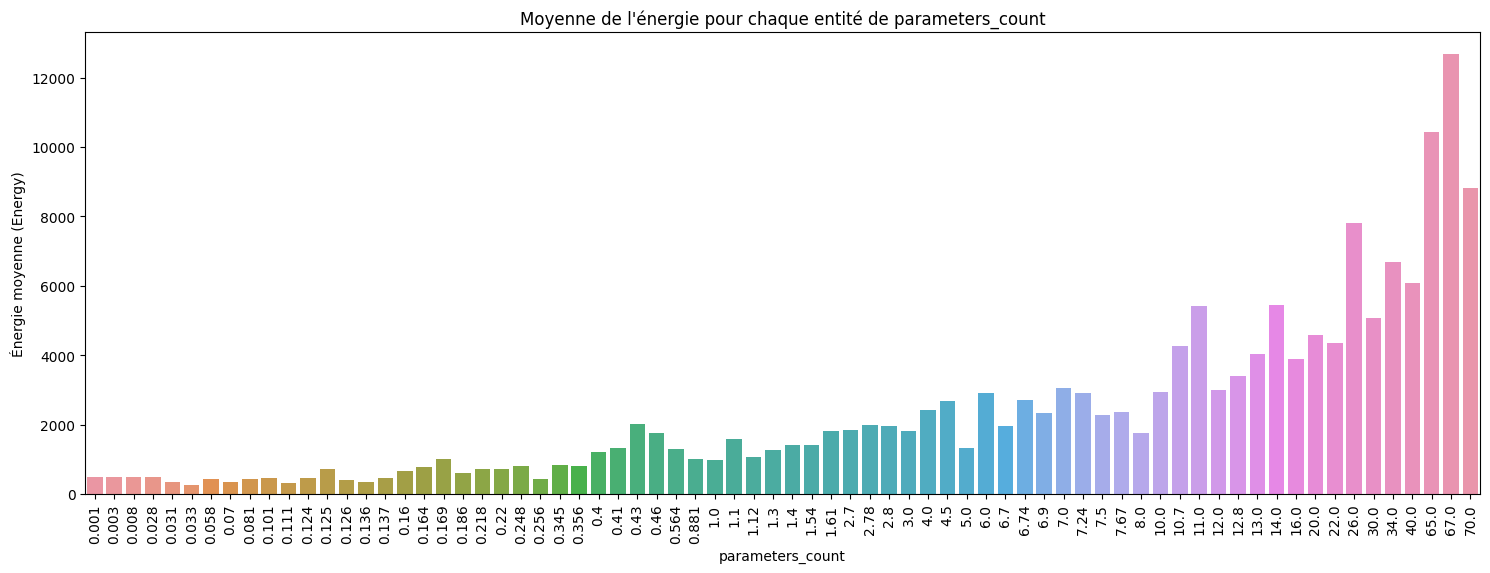

In [23]:
# Visualisation
plt.figure(figsize=(18, 6))  # Augmenter la largeur de la figure
sns.barplot(x='parameters_count', y='energy', data=parameters_energy_mean)
plt.title('Moyenne de l\'énergie pour chaque entité de parameters_count')
plt.xlabel('parameters_count')
plt.ylabel('Énergie moyenne (Energy)')
# Rotation des étiquettes de l'axe x et ajustement de la taille de la police
plt.xticks(rotation=90, fontsize=10)
plt.show()

# déterminer lesquelles parmi les variables 'dtype', 'optimization', 'quantization', et 'parameters_count' influencent le plus la variable 'energy' et à quel degré chaque entité contribue à cette influence

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df_encoded[['dtype', 'optimization', 'quantization', 'parameters_count']]
y = df_encoded['energy']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

categorical_features = ['dtype', 'optimization', 'quantization']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

coefficients = pipeline.named_steps['model'].coef_
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out(
    input_features=X_train.columns)

# Création d'un DataFrame pour analyser les coefficients
coefficients_df = pd.DataFrame(
    {'Feature': feature_names, 'Coefficient': coefficients})
coefficients_sorted = coefficients_df.reindex(
    coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)
print("Coefficients du modèle :")
print(coefficients_sorted)

Coefficients du modèle :
                        Feature  Coefficient
9           cat__quantization_3  2773.409562
12          cat__quantization_6  -764.485245
11          cat__quantization_5  -759.584074
8           cat__quantization_2   737.020861
7           cat__quantization_1  -683.266145
6           cat__quantization_0  -626.412185
13          cat__quantization_7  -558.124133
1                  cat__dtype_1  -262.666874
2                  cat__dtype_2   186.982224
4           cat__optimization_1   178.694557
14  remainder__parameters_count   162.796361
5           cat__optimization_2  -143.562838
10          cat__quantization_4  -118.558642
0                  cat__dtype_0    75.684650
3           cat__optimization_0   -35.131719


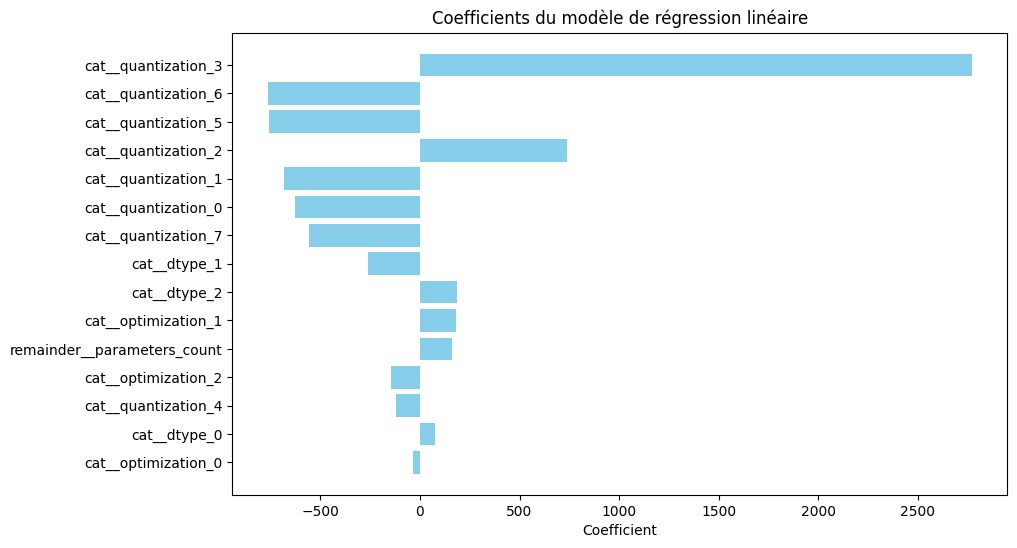

In [25]:
import matplotlib.pyplot as plt

coefficients_sorted['Abs_Coefficient'] = abs(
    coefficients_sorted['Coefficient'])
coefficients_sorted = coefficients_sorted.sort_values(
    by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefficients_sorted['Feature'],
         coefficients_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Coefficients du modèle de régression linéaire')
plt.gca().invert_yaxis()
plt.show()

# cat__quantization_X (où X est un numéro d'entité de quantization) : Ces coefficients indiquent l'effet de chaque entité de quantization sur la variable 'energy'. Plus le coefficient est élevé en valeur absolue, plus l'entité correspondante a d'impact sur l'énergie. Les entités avec les coefficients les plus élevés (positifs ou négatifs) ont le plus d'impact sur l'énergie. Par exemple, 'cat__quantization_3' a le coefficient le plus élevé (positif), ce qui signifie qu'elle a le plus grand effet positif sur 'energy'.

# cat__dtype_X (où X est un numéro d'entité dtype) : Ces coefficients représentent l'effet des différents types de données ('bfloat16', 'float16', 'float32') sur 'energy'. Les coefficients négatifs indiquent une corrélation négative entre ce type de données et l'énergie, tandis que les coefficients positifs indiquent une corrélation positive. Par exemple, 'cat__dtype_1' (correspondant à 'float16') a un coefficient négatif, ce qui suggère que lorsque le type de données est 'float16', l'énergie tend à diminuer.

# cat__optimization_X (où X est un numéro d'entité d'optimization) : Ces coefficients représentent l'effet des différentes techniques d'optimization ('BetterTransformer', 'FlashAttentionV2', 'nan') sur 'energy'. Comme pour les autres variables, les coefficients positifs indiquent une corrélation positive entre cette technique d'optimization et l'énergie, tandis que les coefficients négatifs indiquent une corrélation négative.

# remainder__parameters_count : Ce coefficient représente l'effet du nombre de paramètres sur 'energy'. Comme il s'agit d'une variable continue, son coefficient indique l'augmentation attendue de 'energy' pour une augmentation d'une unité de parameters_count.



# Comment les models se comporte suivants les differentes optimisation et quantification du cote de l'energie 

# la moyenne de l'énergie pour chaque entité de quantization dans différents intervalles de 'parameters_count'.

In [26]:
import pandas as pd

intervals = [(0.001, 0.124), (0.124, 0.256), (0.256, 1), (1, 3),
             (3, 7), (7, 10), (10, 14), (14, 30), (30, 70)]

df_encoded['parameters_count_interval'] = pd.cut(df_encoded['parameters_count'], bins=[
                                                 interval[0] for interval in intervals] + [intervals[-1][1]])

for interval in intervals:
    interval_data = df_encoded[(df_encoded['parameters_count'] >= interval[0]) & (
        df_encoded['parameters_count'] < interval[1])]

    energy_means = interval_data.groupby('quantization')['energy'].mean()

    print(f"Interval {interval}:")
    print(energy_means)
    print()

Interval (0.001, 0.124):
quantization
0    341.360640
1    311.500800
2    505.620480
3    958.740480
4    380.559360
5    304.988160
6    290.942031
7    250.919343
Name: energy, dtype: float64

Interval (0.124, 0.256):
quantization
0     595.200000
1     549.698954
2     948.543247
3    1837.236706
4     660.954764
5     517.268945
6     527.769600
7     414.475018
Name: energy, dtype: float64

Interval (0.256, 1):
quantization
0     983.439360
1     991.744000
2    1633.812480
3    3183.469714
4    1152.512000
5     917.299200
6     996.403200
7     786.940643
Name: energy, dtype: float64

Interval (1, 3):
quantization
0    1181.306880
1    1118.092800
2    1869.507491
3    3458.249788
4    1353.922560
5    1012.662857
6    1075.852800
7    1032.142848
Name: energy, dtype: float64

Interval (3, 7):
quantization
0    1718.894592
1    1601.861009
2    2788.147200
3    4821.401600
4    2068.791652
5    1611.767808
6    1567.134720
7    1768.729600
Name: energy, dtype: float64

Interval

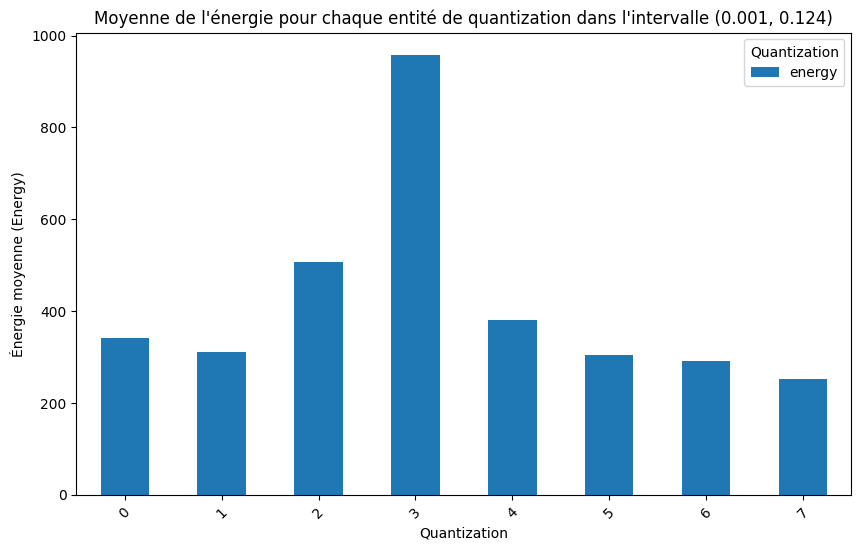

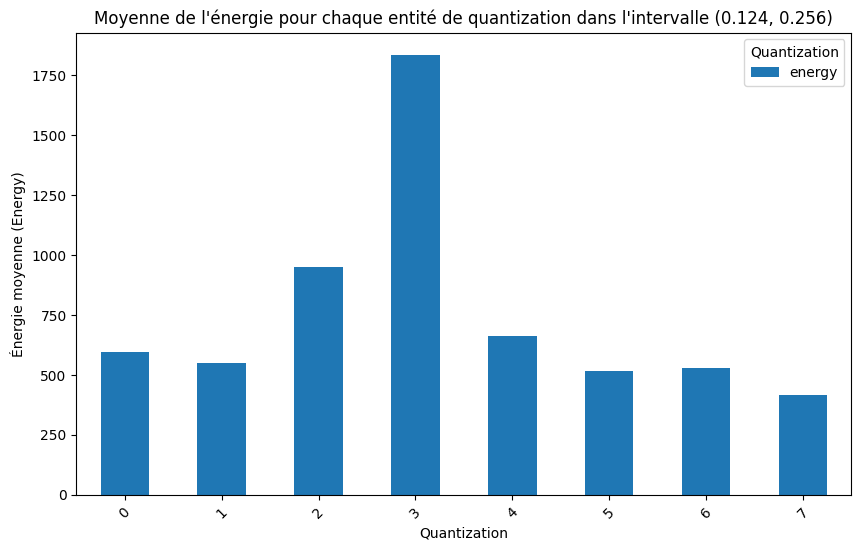

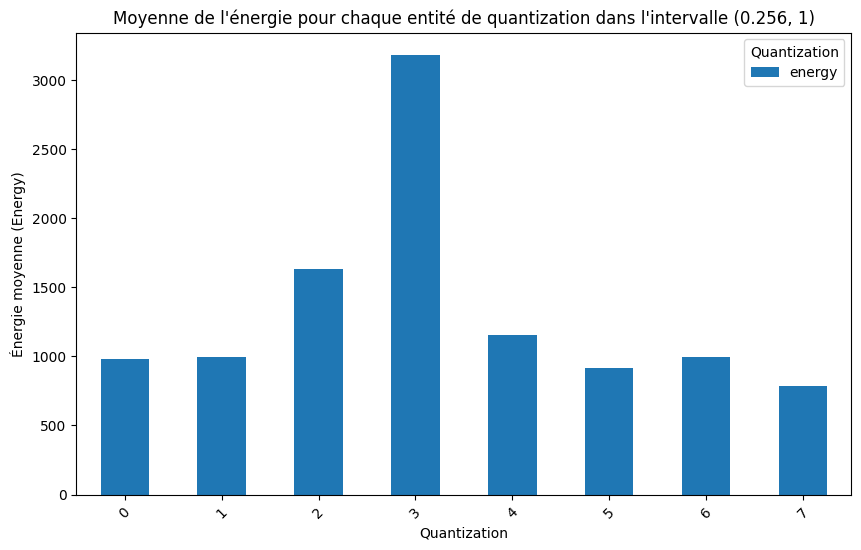

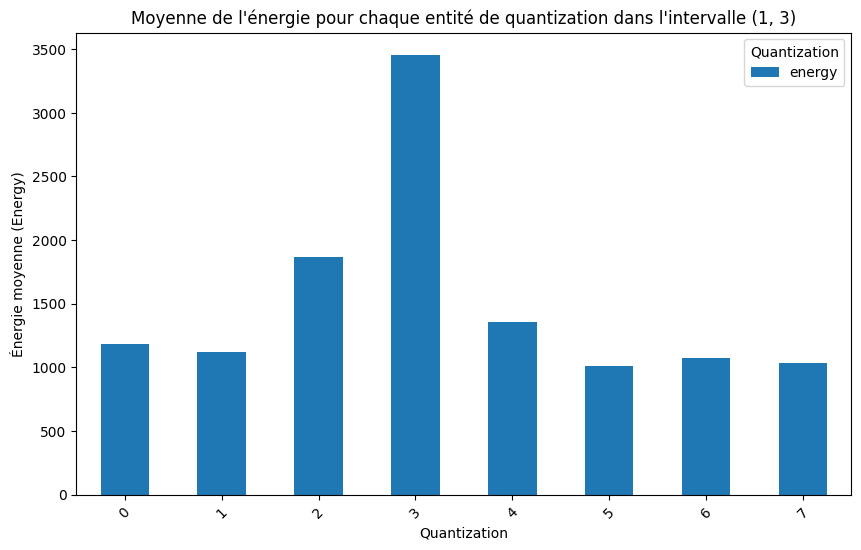

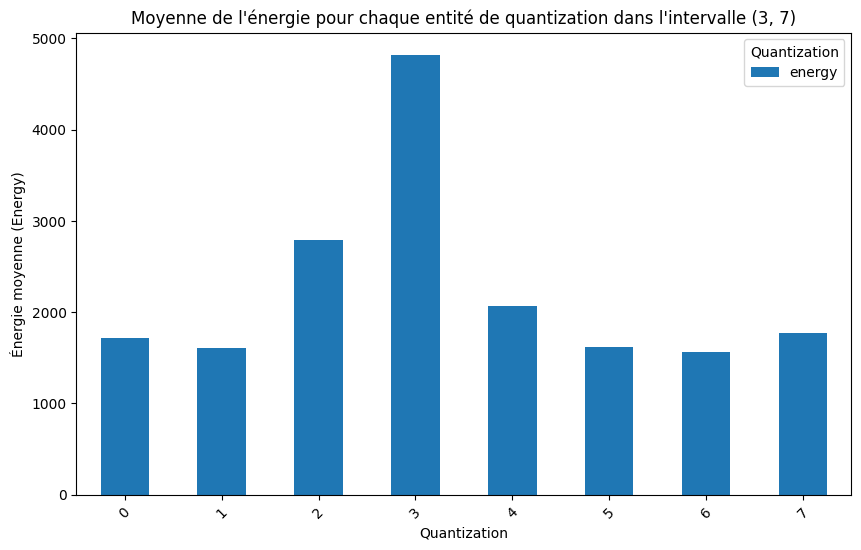

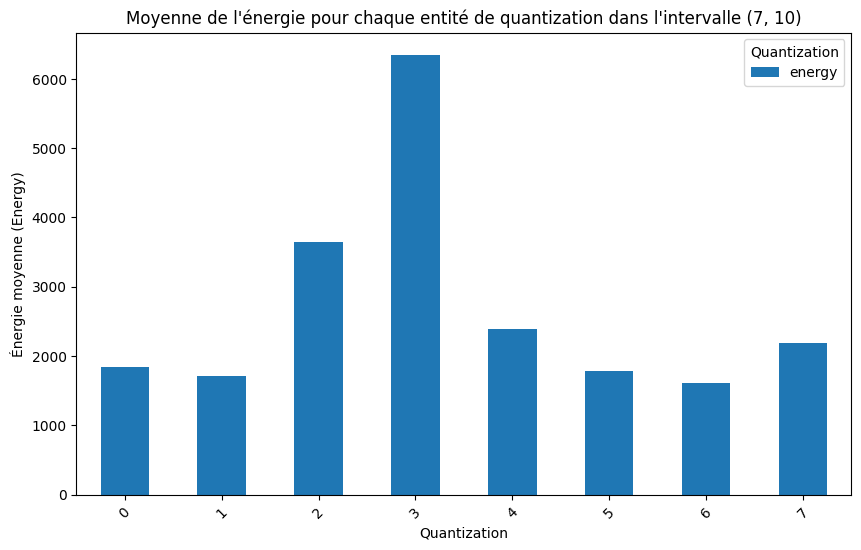

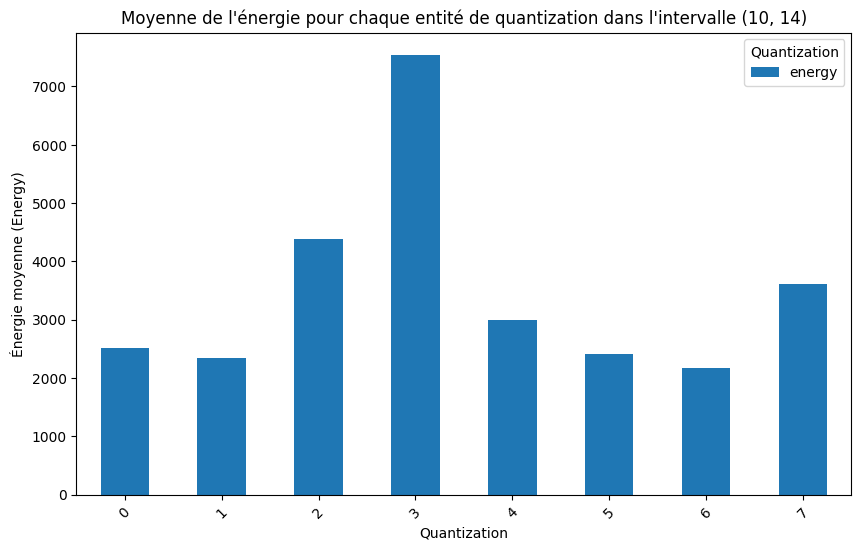

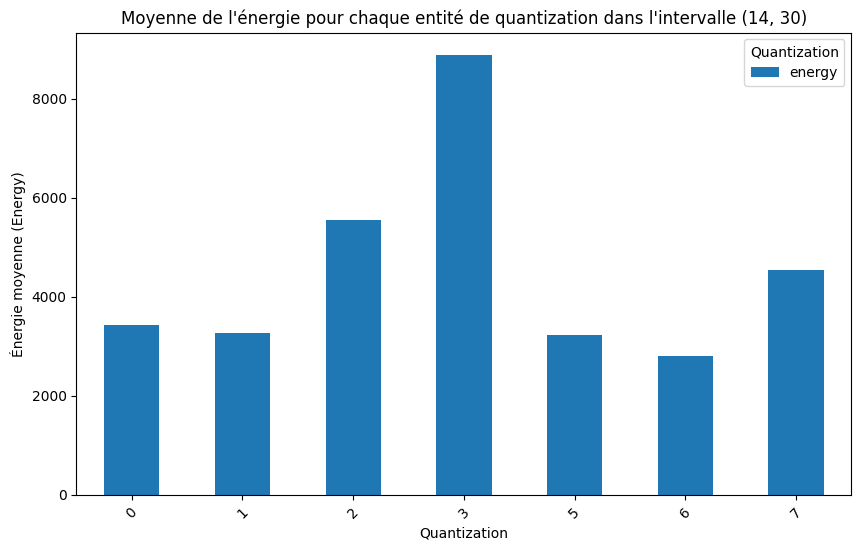

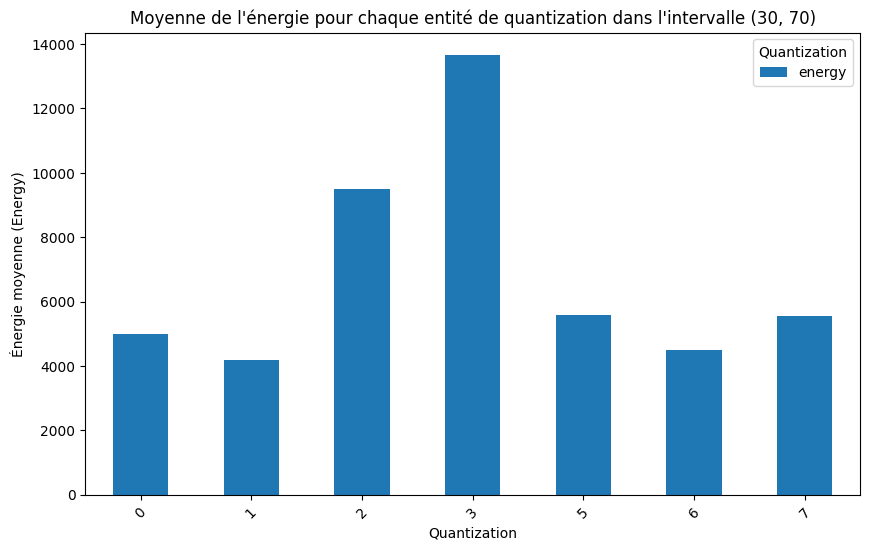

In [27]:
import matplotlib.pyplot as plt

for interval in intervals:
    interval_data = df_encoded[(df_encoded['parameters_count'] >= interval[0]) & (
        df_encoded['parameters_count'] < interval[1])]

    energy_means = interval_data.groupby('quantization')['energy'].mean()

    energy_means.plot(kind='bar', figsize=(10, 6))

    plt.title(
        f'Moyenne de l\'énergie pour chaque entité de quantization dans l\'intervalle {interval}')
    plt.xlabel('Quantization')
    plt.ylabel('Énergie moyenne (Energy)')
    plt.xticks(rotation=45)
    plt.legend(title='Quantization')

    plt.show()

# Il semble que pour chaque intervalle, le type de quantization avec le plus grand nombre d'énergie soit "quantization_3". qui est bnb-8bit

# la moyenne de l'énergie pour chaque entité d'optimization dans chaque intervalle de valeurs de 'parameters_count'

In [29]:
import pandas as pd

intervals = [(0.001, 0.124), (0.124, 0.256), (0.256, 1), (1, 3),
             (3, 7), (7, 10), (10, 14), (14, 30), (30, 70)]

df_encoded['parameters_count_interval'] = pd.cut(df_encoded['parameters_count'], bins=[
                                                 interval[0] for interval in intervals] + [intervals[-1][1]])

for interval in intervals:
    interval_data = df_encoded[(df_encoded['parameters_count'] >= interval[0]) & (
        df_encoded['parameters_count'] < interval[1])]

    energy_means = interval_data.groupby('optimization')['energy'].mean()

    print(f"Interval {interval}:")
    print(energy_means)
    print()

Interval (0.001, 0.124):
optimization
0    591.345712
1    249.999360
2    355.641051
Name: energy, dtype: float64

Interval (0.124, 0.256):
optimization
0    1080.676174
1     496.610743
2     602.653468
Name: energy, dtype: float64

Interval (0.256, 1):
optimization
0    1773.982989
1     934.318080
2    1119.896191
Name: energy, dtype: float64

Interval (1, 3):
optimization
0    2178.913745
1    1023.528960
2    1306.043345
Name: energy, dtype: float64

Interval (3, 7):
optimization
0    3192.027429
1    1644.784941
2    2127.964419
Name: energy, dtype: float64

Interval (7, 10):
optimization
0    4897.938286
1    2390.843077
2    2627.244356
Name: energy, dtype: float64

Interval (10, 14):
optimization
0    6091.161600
1    3308.544000
2    3512.349257
Name: energy, dtype: float64

Interval (14, 30):
optimization
0    6785.489455
1    4267.008000
2    4661.958194
Name: energy, dtype: float64

Interval (30, 70):
optimization
0    12812.544000
1     5554.176000
2     6565.365551
Name

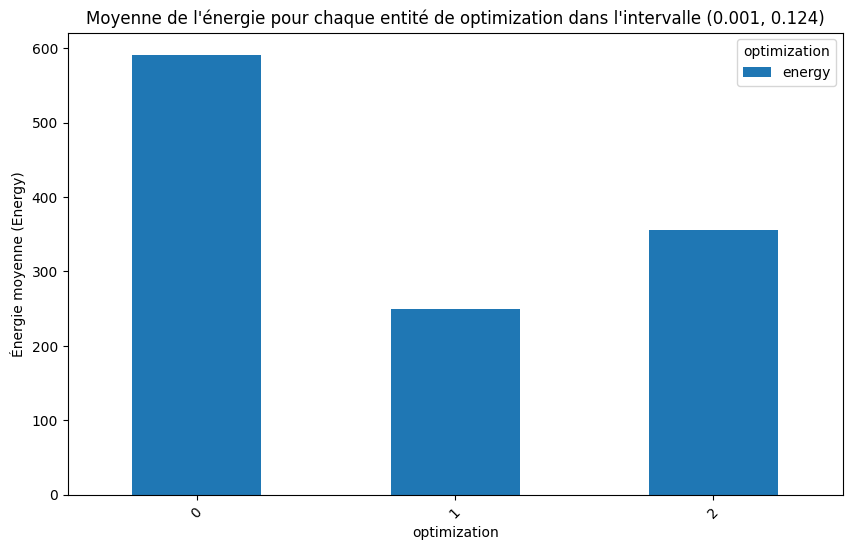

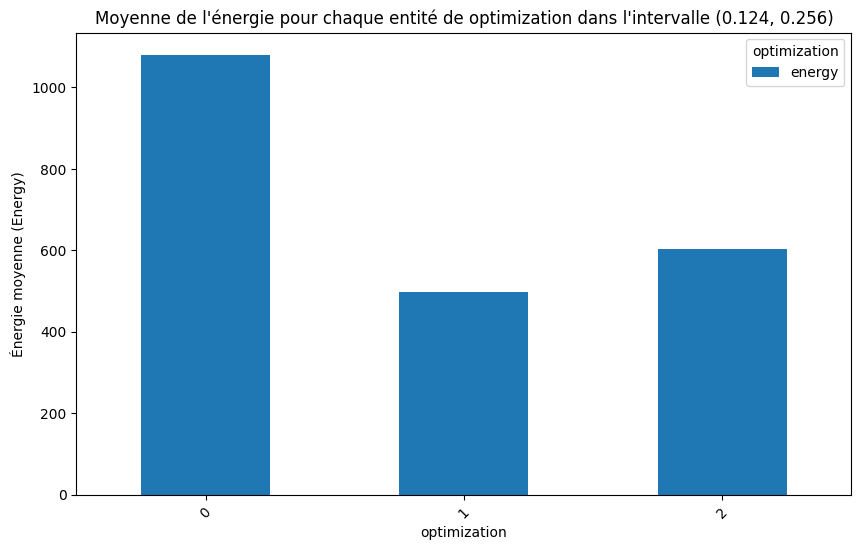

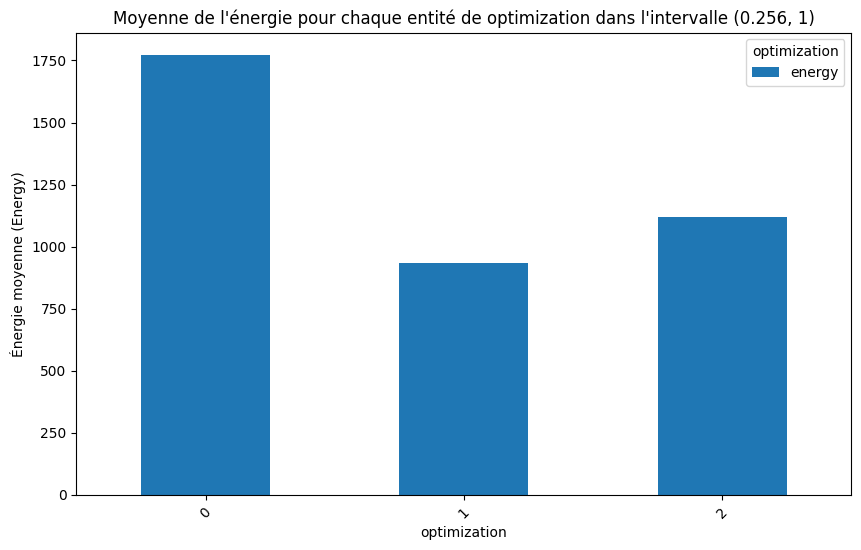

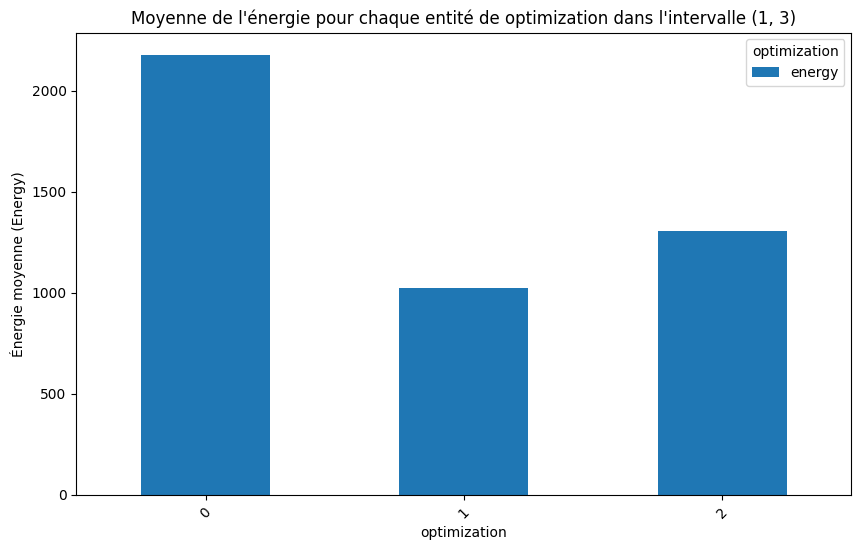

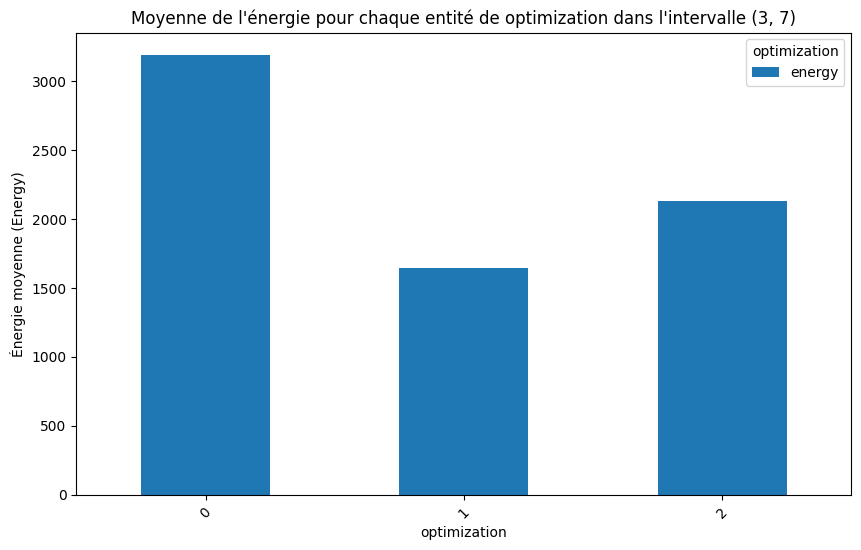

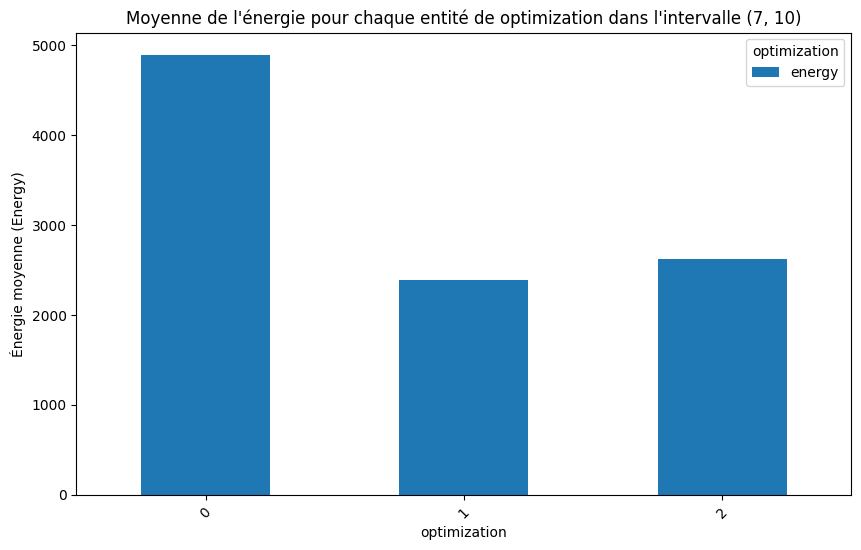

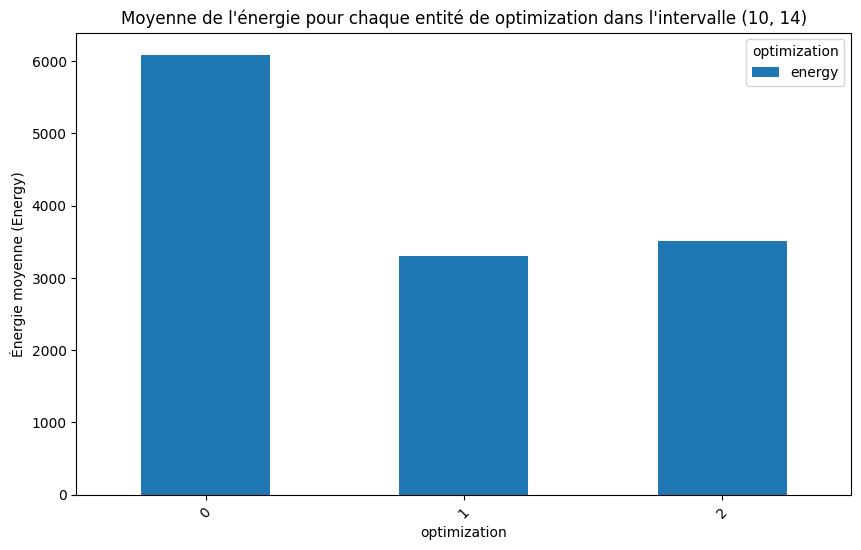

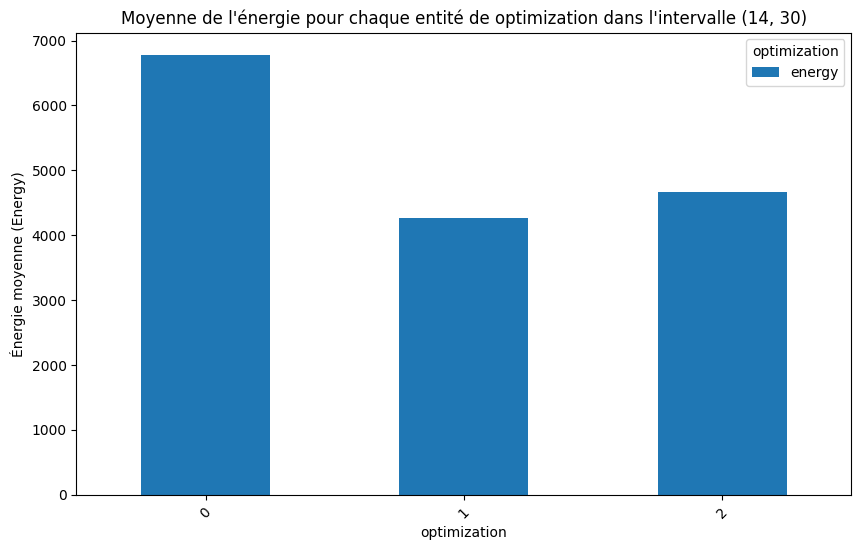

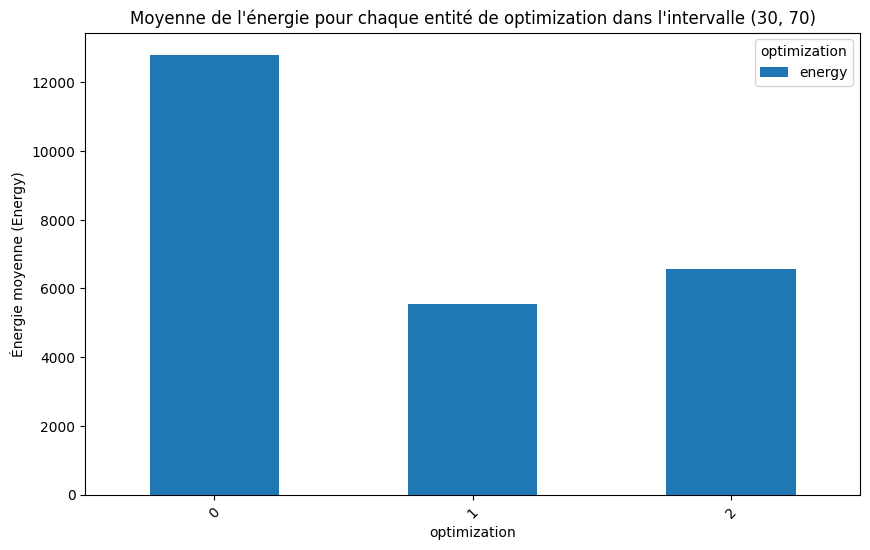

In [30]:
import matplotlib.pyplot as plt

for interval in intervals:
    interval_data = df_encoded[(df_encoded['parameters_count'] >= interval[0]) & (
        df_encoded['parameters_count'] < interval[1])]

    energy_means = interval_data.groupby('optimization')['energy'].mean()

    energy_means.plot(kind='bar', figsize=(10, 6))

    plt.title(
        f'Moyenne de l\'énergie pour chaque entité de optimization dans l\'intervalle {interval}')
    plt.xlabel('optimization')
    plt.ylabel('Énergie moyenne (Energy)')
    plt.xticks(rotation=45)
    plt.legend(title='optimization')

    plt.show()

# Pour chaque intervalle le type d'optimisation avec le plus d'énergie est "0" celui de BetterTransformer

# la moyenne de l'énergie pour chaque entité de dtype dans chaque intervalle de valeurs de 'parameters_count'

In [33]:
import pandas as pd

intervals = [(0.001, 0.124), (0.124, 0.256), (0.256, 1), (1, 3),
             (3, 7), (7, 10), (10, 14), (14, 30), (30, 70)]

df_encoded['parameters_count_interval'] = pd.cut(df_encoded['parameters_count'], bins=[
                                                 interval[0] for interval in intervals] + [intervals[-1][1]])

for interval in intervals:
    interval_data = df_encoded[(df_encoded['parameters_count'] >= interval[0]) & (
        df_encoded['parameters_count'] < interval[1])]

    energy_means = interval_data.groupby('dtype')['energy'].mean()

    print(f"Interval {interval}:")
    print(energy_means)
    print()

Interval (0.001, 0.124):
dtype
0    355.635200
1    426.911861
2    211.072000
Name: energy, dtype: float64

Interval (0.124, 0.256):
dtype
0    560.201143
1    744.885014
2    344.908800
Name: energy, dtype: float64

Interval (0.256, 1):
dtype
0    1036.716218
1    1333.299707
2     684.704914
Name: energy, dtype: float64

Interval (1, 3):
dtype
0    1290.133662
1    1511.453849
2     982.960128
Name: energy, dtype: float64

Interval (3, 7):
dtype
0    1789.175172
1    2379.824058
2    1933.265455
Name: energy, dtype: float64

Interval (7, 10):
dtype
0    2171.723294
1    3097.326933
2    2629.839812
Name: energy, dtype: float64

Interval (10, 14):
dtype
0    3129.559579
1    3931.002740
2    4599.754105
Name: energy, dtype: float64

Interval (14, 30):
dtype
0    3957.350400
1    5007.158557
2    5956.608000
Name: energy, dtype: float64

Interval (30, 70):
dtype
1    7689.312
Name: energy, dtype: float64



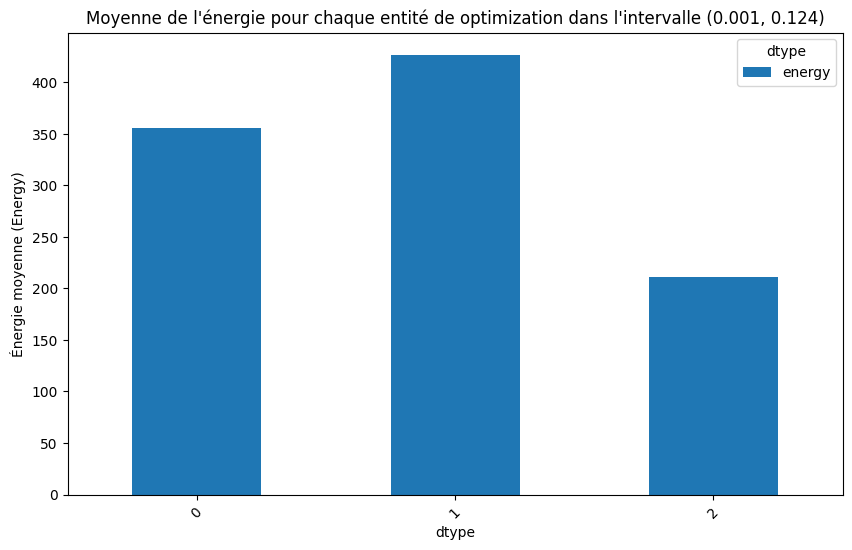

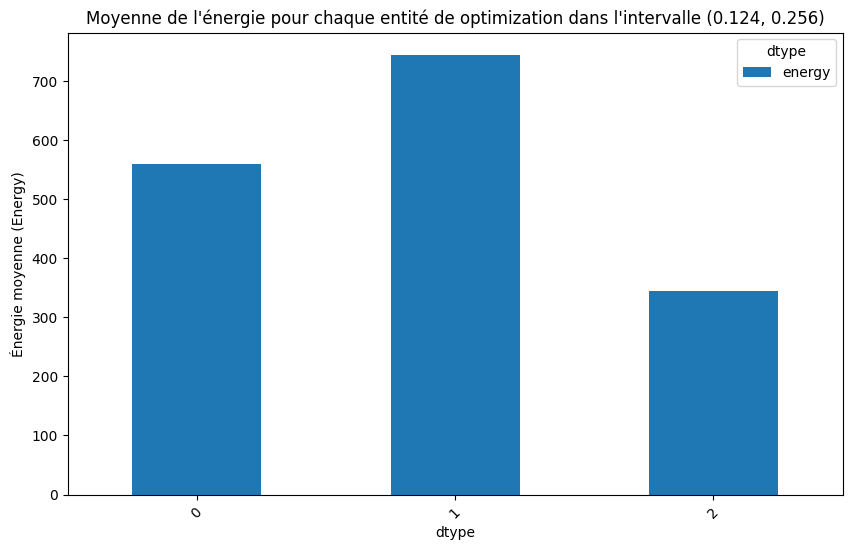

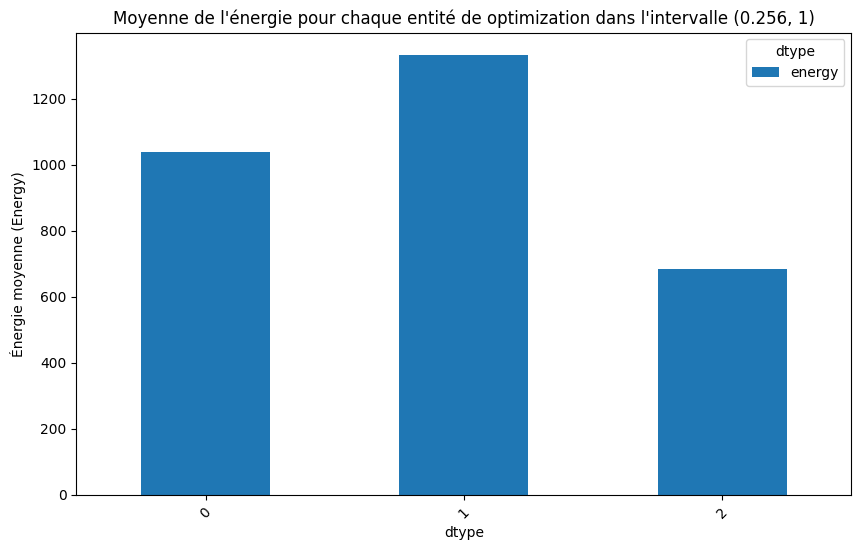

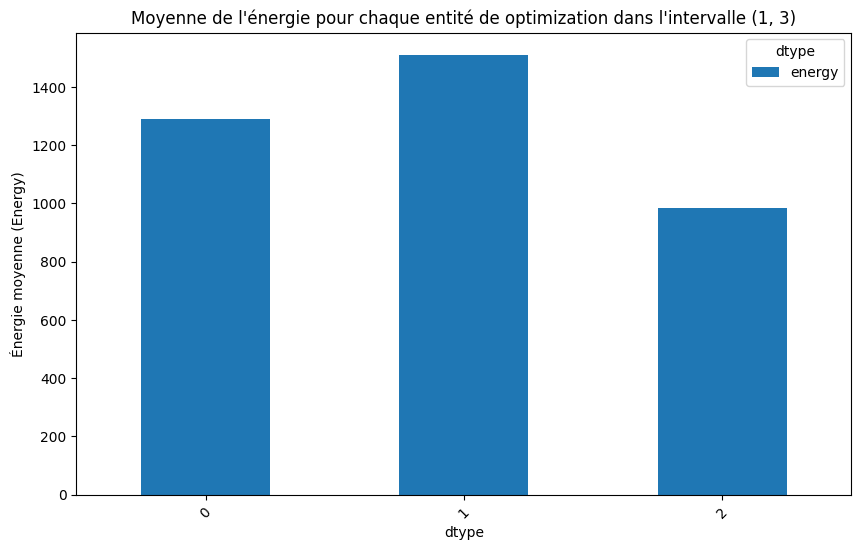

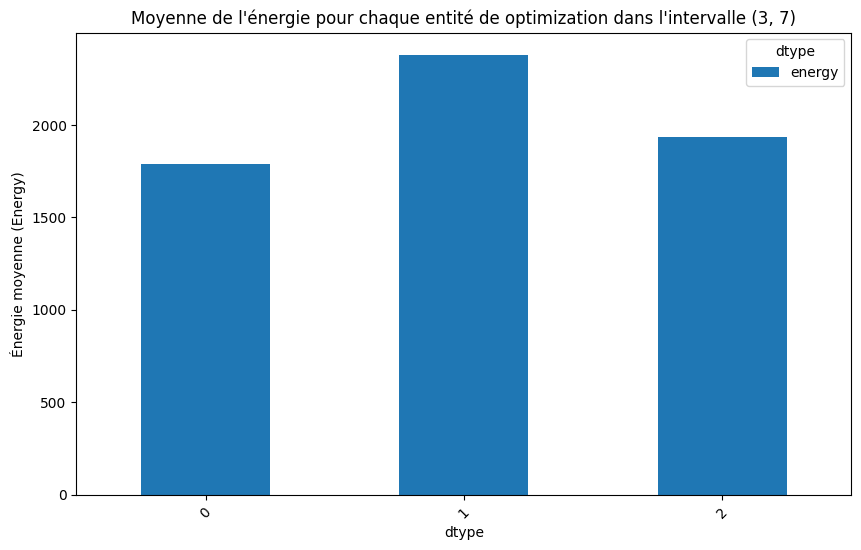

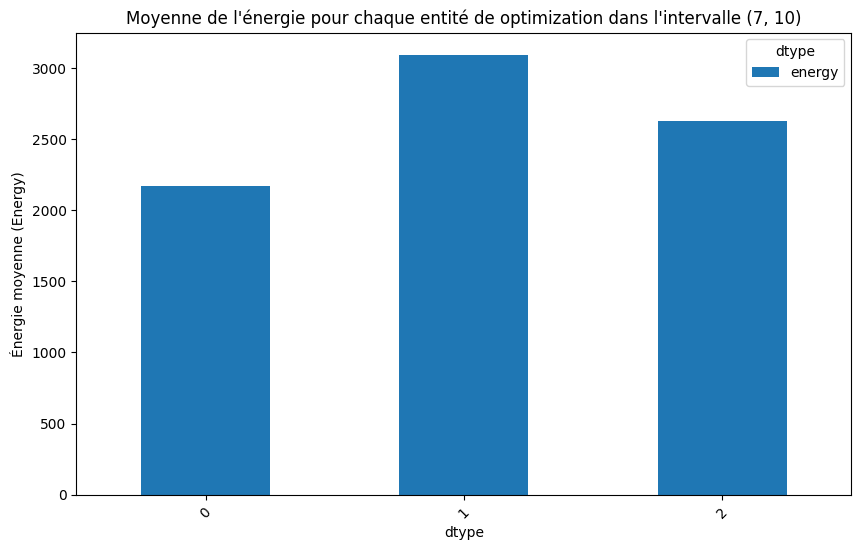

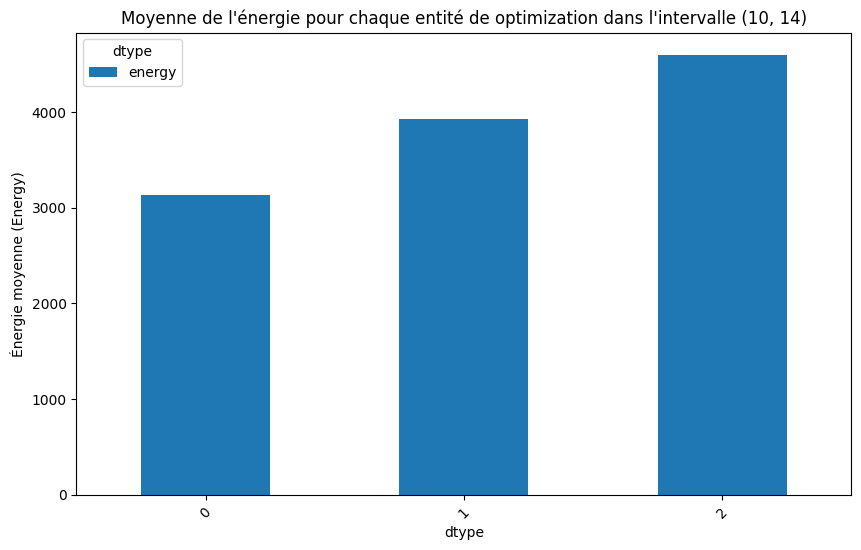

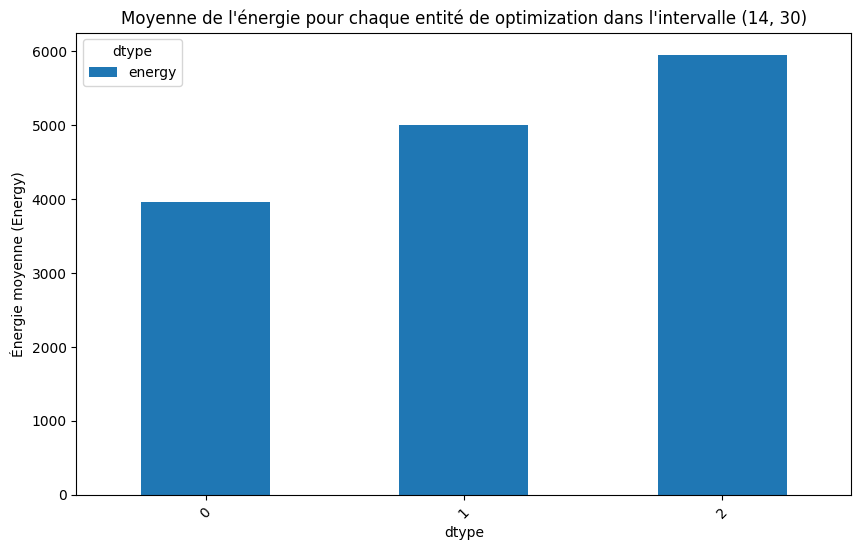

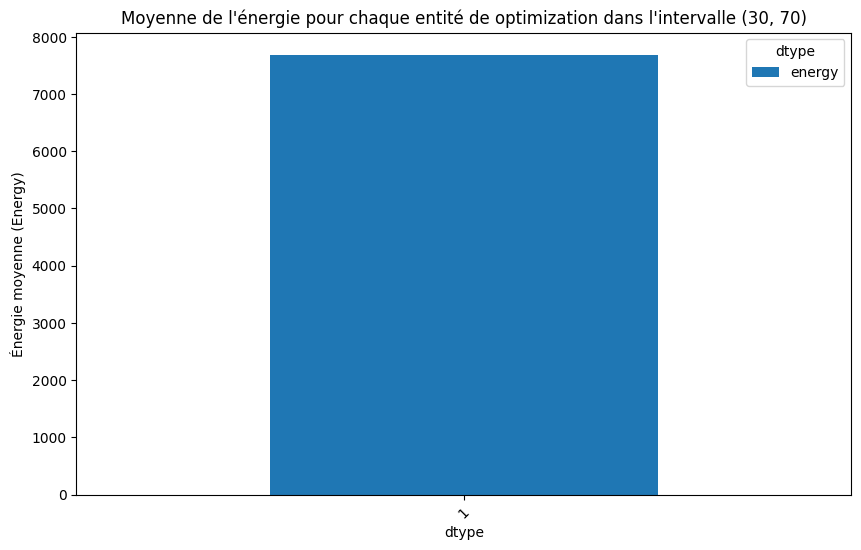

In [34]:
import matplotlib.pyplot as plt

for interval in intervals:
    interval_data = df_encoded[(df_encoded['parameters_count'] >= interval[0]) & (
        df_encoded['parameters_count'] < interval[1])]

    energy_means = interval_data.groupby('dtype')['energy'].mean()

    energy_means.plot(kind='bar', figsize=(10, 6))

    plt.title(
        f'Moyenne de l\'énergie pour chaque entité de optimization dans l\'intervalle {interval}')
    plt.xlabel('dtype')
    plt.ylabel('Énergie moyenne (Energy)')
    plt.xticks(rotation=45)
    plt.legend(title='dtype')

    plt.show()

# pour chaque intervalle, le type de dtype ayant la plus grande valeur de energy est le suivant :

# Intervalles 1 à 6 et 9 : dtype 1 float 16 
# Intervalles 7 et 8 : dtype 2 de 14 a 70 milliard de parametres float 32